In [1]:
import numpy as np
import pandas as pd

## Temperature Prediction

In [2]:
dataset_main = pd.read_csv('dataset/temprature.csv', usecols=['Temp'])

In [3]:
temp_array = dataset_main.values
temp_2darray = np.zeros((temp_array.shape[0],6))
for i in range(temp_2darray.shape[0]-6):
    for j in range(6):
            temp_2darray[i,j] = temp_array[i + j]

In [4]:
dataset = pd.DataFrame(temp_2darray, columns=['D1','D2','D3','D6','D5','D6'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      3650 non-null   float64
 1   D2      3650 non-null   float64
 2   D3      3650 non-null   float64
 3   D6      3650 non-null   float64
 4   D5      3650 non-null   float64
 5   D6      3650 non-null   float64
dtypes: float64(6)
memory usage: 171.2 KB


In [5]:
dataset.sample(10)

,D1,D2,D3,D6,D5,D6
102,13.5,13.0,13.3,12.1,12.4,13.2
2359,6.2,11.9,11.8,9.4,9.6,9.4
2170,12.2,12.4,9.8,8.5,14.7,12.0
272,12.4,8.9,13.2,8.6,6.2,11.4
446,15.6,13.2,14.5,16.8,17.2,13.4
478,16.5,12.9,6.9,6.9,8.7,10.0
3291,16.4,14.8,17.4,18.8,22.1,19.0
1523,10.7,12.6,9.8,13.2,15.2,16.6
3337,20.0,17.0,15.2,16.5,16.5,17.3
1387,9.7,9.9,6.5,9.8,18.2,11.3


In [6]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp2, X_val_temp, y_train_temp2, y_val_temp = train_test_split(X_train_temp, y_train_temp, test_size = 0.05, random_state=42)

In [7]:
X_train_temp = X_train_temp.values.reshape(X_train_temp.shape[0], 1, 5)
X_train_temp2 = X_train_temp2.values.reshape(X_train_temp2.shape[0], 1, 5)
X_test_temp = X_test_temp.values.reshape(X_test_temp.shape[0], 1, 5)
X_val_temp = X_val_temp.values.reshape(X_val_temp.shape[0], 1, 5)

y_train_temp = y_train_temp.values.reshape(y_train_temp.shape[0], 1, 1)
y_train_temp2 = y_train_temp2.values.reshape(y_train_temp2.shape[0], 1, 1)
y_test_temp = y_test_temp.values.reshape(y_test_temp.shape[0], 1, 1)
y_val_temp = y_val_temp.values.reshape(y_val_temp.shape[0], 1, 1)

In [8]:
import tensorflow as tf

In [9]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(64, return_sequences = True, input_shape = (X_train_temp2.shape[1], X_train_temp2.shape[-1])))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(loss='mse', optimizer='adam')

In [10]:
history = lstm_model.fit(X_train_temp2, y_train_temp2, batch_size=64, epochs=100, validation_data=(X_val_temp, y_val_temp))

Epoch 1/100
44/44 [==============================] - 1s 8ms/step - loss: 104.4174 - val_loss: 67.5205
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 44.4628 - val_loss: 24.0062
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 22.1180 - val_loss: 14.6553
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 16.5224 - val_loss: 11.3657
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 14.4845 - val_loss: 9.6783
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 12.5923 - val_loss: 8.6007
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 11.6688 - val_loss: 7.9690
Epoch 8/100
44/44 [==============================] - 0s 1ms/step - loss: 11.2666 - val_loss: 7.6753
Epoch 9/100
44/44 [==============================] - 0s 1ms/step - loss: 10.4413 - val_loss: 7.3374
Epoch 10/100
44/44 [==============================] - 0s 1ms/step - loss: 10.1147 - val_loss: 7

Text(0, 0.5, 'MSE value')

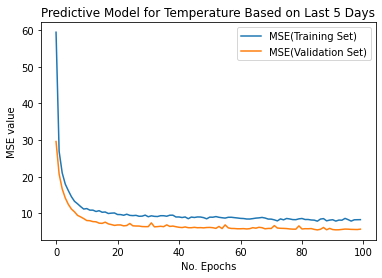

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="MSE(Training Set)")
plt.plot(history.history['val_loss'], label="MSE(Validation Set)")
plt.title("Predictive Model for Temperature Based on Last 5 Days")
plt.legend()
plt.xlabel("No. Epochs")
plt.ylabel("MSE value")

## Training on whole of the training set

In [12]:
lstm_model_5 = tf.keras.Sequential()
lstm_model_5.add(tf.keras.layers.LSTM(64, return_sequences = True, input_shape = (X_train_temp2.shape[1], X_train_temp2.shape[-1])))
lstm_model_5.add(tf.keras.layers.Dropout(0.5))
lstm_model_5.add(tf.keras.layers.Dense(1))
lstm_model_5.compile(loss='mse', optimizer='adam')

In [13]:
lstm_model_5.fit(X_train_temp, y_train_temp, batch_size=64, epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 102.4934
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 46.8169
Epoch 3/100
46/46 [==============================] - 0s 997us/step - loss: 25.4086
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 17.3014
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 15.3454
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 13.3149
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 12.3968
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 11.5849
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 10.9321
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 10.8161
Epoch 11/100
46/46 [==============================] - 0s 1ms/step - loss: 10.0808
Epoch 12/100
46/46 [==============================] - 0s 1ms/step - loss: 10.1122
Epoch 13/100
46/46 [==

## Evaluation

In [14]:
y_pred_temp = lstm_model_5.predict(X_test_temp)

In [15]:
y_pred_temp = y_pred_temp.reshape(y_pred_temp.shape[0])
y_test_temp = y_test_temp.reshape(y_test_temp.shape[0])
y_pred_temp[:3]

array([7.669487, 9.604403, 8.659293], dtype=float32)

In [16]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error of the Test Set:", mean_squared_error(y_pred_temp, y_test_temp))

Mean Squared Error of the Test Set: 5.732424828948108


## Predicting Temperature Using 30 Days

In [17]:
temp30_array = dataset_main.values
temp30_2darray = np.zeros((temp30_array.shape[0],31))
for i in range(temp30_2darray.shape[0]-31):
    for j in range(31):
            temp30_2darray[i,j] = temp30_array[i + j]

In [18]:
dataset30 = pd.DataFrame(temp30_2darray, columns=['D{0}'.format(i+1) for i in range(31)])

In [19]:
dataset30.sample(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
3418,10.2,9.5,8.9,13.4,9.1,9.4,8.7,5.8,4.5,7.2,...,8.5,10.4,6.8,6.0,6.6,7.8,10.3,7.2,7.4,11.4
524,2.3,4.5,8.2,6.9,7.3,6.0,7.3,7.6,8.0,8.0,...,9.0,4.2,1.6,2.6,3.4,3.9,7.0,7.8,5.3,2.4
2507,11.9,9.5,13.5,15.2,18.4,24.1,14.1,10.7,8.7,13.3,...,12.7,11.6,11.0,11.3,13.4,14.9,15.2,13.9,15.0,16.2
385,20.5,19.3,15.8,17.0,18.4,13.3,14.6,12.5,17.0,17.1,...,15.4,17.0,19.2,22.8,26.3,18.2,17.0,14.8,12.8,15.5
2681,14.5,12.6,13.6,11.2,11.0,12.0,6.8,10.6,13.1,13.5,...,10.9,8.7,9.3,6.3,7.8,10.0,11.0,11.1,12.6,10.2
2338,6.4,10.8,7.8,8.5,9.7,10.0,11.0,10.2,6.6,6.1,...,6.2,11.9,11.8,9.4,9.6,9.4,7.0,8.9,9.3,6.8
578,8.3,9.1,2.8,2.2,4.5,3.8,3.8,6.2,11.5,10.2,...,5.1,12.1,11.2,8.5,4.6,7.0,14.2,12.7,7.6,4.0
334,13.4,10.5,14.2,11.5,13.0,15.0,14.7,12.6,12.5,13.5,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1755,12.7,10.0,10.2,6.5,9.2,11.9,14.7,11.4,6.8,7.4,...,15.5,21.0,10.0,9.6,12.0,12.2,11.3,13.2,10.5,10.1
1840,14.6,11.6,13.1,12.8,15.2,13.8,15.0,13.5,11.8,15.3,...,14.4,11.8,15.8,16.0,11.8,14.5,10.7,14.2,19.5,21.4


In [32]:
from sklearn.model_selection import train_test_split
X = dataset30.iloc[:,:-1]
y = dataset30.iloc[:,-1]
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp2, X_val_temp, y_train_temp2, y_val_temp = train_test_split(X_train_temp, y_train_temp, test_size = 0.05, random_state=42)

In [33]:
X_train_temp = X_train_temp.values.reshape(X_train_temp.shape[0], 1, 30)
X_train_temp2 = X_train_temp2.values.reshape(X_train_temp2.shape[0], 1, 30)
X_test_temp = X_test_temp.values.reshape(X_test_temp.shape[0], 1, 30)
X_val_temp = X_val_temp.values.reshape(X_val_temp.shape[0], 1, 30)

y_train_temp = y_train_temp.values.reshape(y_train_temp.shape[0], 1, 1)
y_train_temp2 = y_train_temp2.values.reshape(y_train_temp2.shape[0], 1, 1)
y_test_temp = y_test_temp.values.reshape(y_test_temp.shape[0], 1, 1)
y_val_temp = y_val_temp.values.reshape(y_val_temp.shape[0], 1, 1)

In [34]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(64, return_sequences = True, input_shape = (X_train_temp2.shape[1], X_train_temp2.shape[-1])))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(loss='mse', optimizer='adam')

In [35]:
history = lstm_model.fit(X_train_temp, y_train_temp, batch_size=64, epochs=100, validation_data=(X_val_temp, y_val_temp))

Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 82.9242 - val_loss: 50.9934
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 40.6834 - val_loss: 32.1302
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 27.7382 - val_loss: 21.7061
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 20.8047 - val_loss: 17.6087
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 18.2370 - val_loss: 15.2433
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 16.6388 - val_loss: 13.2706
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 14.8975 - val_loss: 11.9483
Epoch 8/100
46/46 [==============================] - 0s 1ms/step - loss: 13.7811 - val_loss: 10.9311
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 12.9662 - val_loss: 10.3888
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 12.3349 - val_los

Text(0, 0.5, 'MSE value')

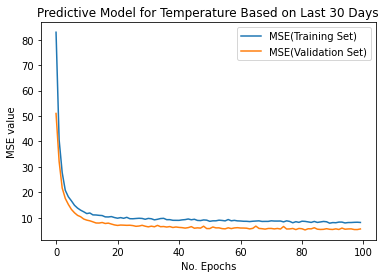

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="MSE(Training Set)")
plt.plot(history.history['val_loss'], label="MSE(Validation Set)")
plt.title("Predictive Model for Temperature Based on Last 30 Days")
plt.legend()
plt.xlabel("No. Epochs")
plt.ylabel("MSE value")

## Training on whole of the training set

In [25]:
lstm_model_30 = tf.keras.Sequential()
lstm_model_30.add(tf.keras.layers.LSTM(64, return_sequences = True, input_shape = (X_train_temp.shape[1], X_train_temp.shape[-1])))
lstm_model_30.add(tf.keras.layers.Dropout(0.5))
lstm_model_30.add(tf.keras.layers.Dense(1))
lstm_model_30.compile(loss='mse', optimizer='adam')

In [26]:
lstm_model_30.fit(X_train_temp, y_train_temp, batch_size=64, epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 68.7928
Epoch 2/100
46/46 [==============================] - 0s 1ms/step - loss: 26.6314
Epoch 3/100
46/46 [==============================] - 0s 1ms/step - loss: 20.6876
Epoch 4/100
46/46 [==============================] - 0s 1ms/step - loss: 18.1620
Epoch 5/100
46/46 [==============================] - 0s 1ms/step - loss: 15.8642
Epoch 6/100
46/46 [==============================] - 0s 1ms/step - loss: 14.5481
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 13.3087
Epoch 8/100
46/46 [==============================] - 0s 997us/step - loss: 12.7987
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 12.0872
Epoch 10/100
46/46 [==============================] - 0s 1ms/step - loss: 11.6593
Epoch 11/100
46/46 [==============================] - 0s 1ms/step - loss: 11.3027
Epoch 12/100
46/46 [==============================] - 0s 997us/step - loss: 11.0776
Epoch 13/100
46/46 [=

## Evaluation

In [27]:
y_pred_temp = lstm_model_30.predict(X_test_temp)

In [28]:
y_pred_temp = y_pred_temp.reshape(y_pred_temp.shape[0])
y_test_temp = y_test_temp.reshape(y_test_temp.shape[0])

In [29]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error of the Test Set for the model which use 30 Days for predicting:", mean_squared_error(y_pred_temp, y_test_temp))

Mean Squared Error of the Test Set for the model which use 30 Days for predicting: 7.194066615524181
